# Function

## Define

In [1]:
def my_function(arg1, arg2):
    #body of function is indented once
    '''Here i can say what my function dooes.
        And I can use several lines
        arg1: It is a good idea to define arguments as well
        arg2: And another one'''
    print(f'I am going to add {arg1} and {arg2} together')
    total = arg1+ arg2
    return total

In [2]:
add=my_function(110,21000) # Caling the function
print(add)

I am going to add 110 and 21000 together
21110


## Type of Arguments
Can specify these in different ways. You can have required and optional arguments, you can give arguments by position (like above) or by name

In [4]:
# Give arguments per name (keyword argument)
add=my_function(arg2=10, arg1=2)
print(add)

#The following is illegal as positional arguments need to be first listed.
#add=my_function(arg2=1,2) #This has 2 values for arg2
#If mising positional and keyword arguments, poistional arguments are attribiuted in order so the following
# Does not work
#add=my_function(2,arg1=1) #This technically has 2 values for arg1

I am going to add 2 and 10 together
12


In [13]:
#Optional arguments
def my_function(arg1,opt=False):
    if opt is not False:
        return(arg1*opt)
    else:
        return(arg1)
print(my_function(2))
print(my_function(2,4))

2
8


WHats happening in the following??/
Whats happens is that for Python, 0 is false. So if '0' is false and the else section is excecuted.

In [14]:
def my_function(arg1, opt=None):
    if opt: #This is false when opt is considered false Python considers this as None, False or 0
        #Be sure to do the right if condition, this is very arbitrary
        return(arg1*opt)
    else:
        return(arg1)
    
print(my_function(1,0))

1


In [16]:
#Optional arguments can also be used to define default values instead of nothing:
def add_5_or(arg1, opt=5):
    return(arg1+opt)

print(add_5_or(1))
print(add_5_or(1,20))

6
21


In [18]:
#USe lits/tuples or dictionaries to specify arguments
t=(1,4)
print(add_5_or(*t))

dic={'arg1':1, 'opt':4}
print(add_5_or(**dic))

5
5


if you remembe we saw  ** operator last weeek with the str.format() method. It is the same here. 
Specifiying arguemnst via a dcitionary can be useful for specifying  options for plot routines. When tailoring plots, we usually end up with lots of options. Defining a dictionary for those can allow for a more readable code and for easier reuse of the options between plots


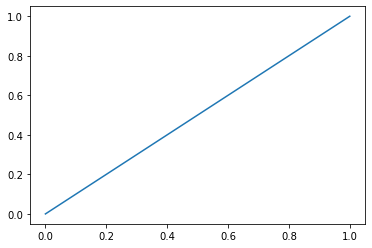

In [20]:
#An example for plots:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1])

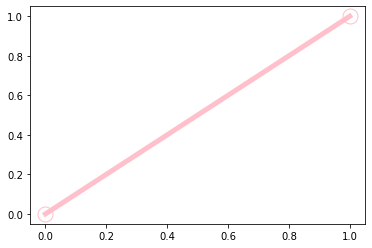

In [24]:
plot_opt={"linewidth":5,
         "color":"pink",
         "marker":"o",
         "markersize":15,
         "fillstyle":"none"}
plt.plot([0,1],[0,1],**plot_opt)

Global vs Local scope
Variables defined in a a function are local, unknown from the outside of the function. On the other hand, variables defined outside a function are known to the functions are they are in a scope comprising the function
Run the following code, Do you udnerstand it?

In [43]:
#total=0
def summing(arg1, arg2):
    total = arg1+arg2
    return total
add= summing(1,2)
print("After the function", total)


After the function 2
Final add: 9


In [44]:
total=0
def summing(arg1, arg2):
    total = arg1+arg2
    return total
add= summing(1,2)
print("After the function", total)

#What not to do!!!!!!!!!!!!, As pyuthon will go outside the function. Never use variables that havent be defined in functions
total=2
def sum2(arg1, arg2):
    tt= arg1+arg2+total #Total still works here even though not defined in the function, if it isnt found insid eteh functionit loosk outside for the value
    return tt
add = sum2(3,4)
print("Final add:", add)

After the function 0
Final add: 9


Notice the difference between these two pieces of code. In the first instance when we take out the total = 0 outside the function the argumennt return is 2, because we define the value of total inside the function. However when we define the variable total = 0 outside the function it overwrites as it is a scope oustide the function. Never use a variable in a function that is undefined outside of function

## Pass by Reference vs Value
Puthon passes arguments per reference. That means they still point to the same location in memory outside and within a function.
Do you understand the following example?

def changeme(li):
    li[0] = 3 #Only first element changed
    return
def changeme2(li):
    li=[5,4] #Here we just completely redefined the list, local variable poi
    return #SO this func doesnt reall do anything 

li=[1,2]
print(f"List at the start: {li}")

changeme(li)
print(f"List after changeme:{li}")

changeme2(li)
print(f"List after changeme2: {li}")

In [49]:

def local_copy(li):
    loc=li
    loc[0] = 3
    return loc
li=[1,2]
print(local_copy(li), li)

## if we actually want to make a copy that works
def local_copy(li):
    loc=list(li)
    loc[0] = 3
    return loc
li=[1,2]
print(local_copy(li), li)


[3, 2] [3, 2]
[3, 2] [1, 2]


# Read in files, Write to files

## Open and close files

To open a text file, there is the `open()` function. It accepts 2 arguments: name of the file and the opening mode for the file.

| Modes | Meaning |
|:------:|--------|
| r   | read-only mode |
| w   | write-only mode |
| a   | append to existing file |
| r+  | read and write mode |

For binary files, you need to append `b` to the mode so Python knows to read or write byte objects.
To read in data, there are 3 methods: `read()`, `readline()`, `readlines()`. The only difference is the amount of data they read from the file. `read()` will only read the given number of charaters (or whole file), `readline()` reads the file line by line, `readlines()` reads in the entire file or a maximum number of bytes/characters.
Also, Python handily manages the conversion of end of line markers (`\n` on Unix, `\r\n` on Windows) so you don't have to worry about it.

To close a file, use the `close()` method.

## Read from a file

In [60]:
#f.seek(0) allows to rewind thef ile to the start of the file after each read.
#Check what each output looks like. What is the difference betwee 'f.read()' and 'f.readlines()?'

f=open('test.txt','r')
whole_file = f.read()
f.seek(0) 
first_line = f.readline()
f.seek(0)
whole2 = f.readlines()
f.close()

In [62]:
print(whole_file, # the whole file
      first_line, # Just teh first line of the text
      whole2) # List of strings, each element of list is one line of the file

This is an example text file.
Let's see what happens with csv-type files
50, 30, 40
70, 20, 30
 This is an example text file.
 ['This is an example text file.\n', "Let's see what happens with csv-type files\n", '50, 30, 40\n', '70, 20, 30\n']


In [63]:
whole_file # WHole file in one string, keeps end of line markers

"This is an example text file.\nLet's see what happens with csv-type files\n50, 30, 40\n70, 20, 30\n"

## Write to file
Symmetrical to reading in

In [68]:
f = open('my_file.txt', 'w')
f.write('Hello!')
lines=['Other line', 'One more']
f.writelines(lines)
f.close()

To check what is in the file we use the iPython magic commands to call the cat bash command

In [ ]:
!more my_file.txt #the given notes said use !cat but it didnt work, !more seems to do the same thing though

In [76]:
f = open('my_file.txt', 'w')
f.write('Hello!\n')
lines=['Other line\n', 'One more\n']
f.writelines(lines)
f.close()

In [106]:
!more my_file.txt

Hello!
Other line
One more


## With Statement
can use the with statement to work with file. This is commonly used as it provides better error handline and cloes teh file for you

In [82]:
with open('test.txt', 'r') as f:
    first_line = f.readline()
    
print(first_line)
second_line = f.readline()
print(second_line)

#This error occurs because the with automatically closes teh file

This is an example text file.



ValueError: I/O operation on closed file.

## Exercise




Exercise
Create a list of the numerical tabular values in test.txt. Make sure the values are of a numeric type (hint: check the Python builtin functions here).
https://docs.python.org/3/library/functions.html#built-in-functions

Format the list as you wish:

[50,30,40,70,20,30]

[[50,30,40],[70,20,30]]

[[50,70],[30,20],[40,30]]

 

with open('test.txt','r') as f:
    # skip the header
    head_length=2 # number of lines in the reader
    for i in range(head_length):
        f.readline()

### Create a list to store the data
li = []
li2 = []
li3 = []
### Read each line and parse as needed.
for line in f.readlines():
    tt = line.split(',')
    tmp = [int(numb) for numb in tt]
    li.extend(tmp)
    li2.append(tmp)
    if li3 == []:
        li3=[[n] for n in tmp]
    else:
        for ind in range(len(tmp)):
            li3[ind].append(tmp[ind])

In [94]:
with open('test.txt','r') as f:
    # skip the header
    head_length=2 # number of lines in the reader
    for i in range(head_length):
        f.readline()

### Create a list to store the data
    li = []
    li2 = []
    li3 = []
### Read each line and parse as needed.
    for line in f.readlines():
        tt = line.split(',')
        tmp = [int(numb) for numb in tt]
        for numb in tt:
            tmp.append(int(numb))
        print(tmp)
    tmp=[int (numb) for numb in tt]

[50, 30, 40, 50, 30, 40]
[70, 20, 30, 70, 20, 30]


# Addiotonal Packages

When you start Python very little gets loaded by default. This is to ensure a quick start of the interpreter and a lower memory usage. Obviously, you will need more than the default.

Additionally, Python is open-sourced and as such lots of additional packages have been contributed over the years. These packages need to be installed before being able to use them.

There are several ways to install packages. A simple one for individuals is Anaconda or Miniconda. That is what you used to prepare for this training (remember the instructions sent before the first training?). One advantage is that it handles dependencies on other packages and non-Python libraries for you. One disadvantage is that not all packages are shared via conda. It also creates a lot of files, which is not good for NCI.

For working at NCI, the CMS maintain several Python environments to avoid duplications. These are quite extensive and we are open to installing more packages (as long as they are compatible with the existing environment). Please try those environments before installing your own. They are publicly opened, so not just for the Centre's folk.

```
module use /g/data/hh5/public/modules
module load conda
```

This will load the stable environment for Python 3, which is most likely the one you want to use. A list of the packages under this environment can be found with: `conda list`

### Load packages for use in your scripts or notebooks
You can load new packages at any point in your script. It's usually done at the top but it doesn't have to.

In [98]:
import numpy    # Most basic form. Imports the whole package
import numpy as np   # Imports the whole package but give an alias to save on typing in your code
from matplotlib import pyplot as plt   # Import just one part of the package.
import matplotlib.pyplot as plt   # Does the same as above.

In [99]:
# To use a package:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

### Some useful packages

From basic Python install:
 - <span style='color:orangered'>os</span>: operating system, e.g. environment variables, working directory, change permissions on files and directories.
 - <span style='color:orangered'>pathlib</span>: pathname manipulations, e.g. separate or join basename and file name, check file existence.
 - <span style='color:orangered'>shutil</span>: file operations, e.g. copy, move, delete files
 - <span style='color:orangered'>glob</span>: pathname pattern expansion, e.g. list of files matching: './[0-9].*'
 - <span style='color:orangered'>argparse</span>: parser for command-line options.
 - <span style='color:orangered'>subprocess</span>: to run a separate program.
 
Additional packages:
 - <span style='color:orangered'>numpy</span>: arrays in Python
 - <span style='color:orangered'>scipy</span>: more maths functions (FFT, ODE, linear algebra, interpolation etc.)
 - <span style='color:orangered'>pandas</span>: the ultimate to work with time series
 - <span style='color:orangered'>xarray</span>: better arrays in Python (labelled arrays)
 - <span style='color:orangered'>matplotlib</span>: plotting in Python
 - <span style='color:orangered'>cartopy</span>: map projection and plotting in Python
 - <span style='color:orangered'>dask</span>: parallelisation 